Pada artikel ini, kami akan membahas dengan contoh -
1. Agregasi Data menggunakan groupby () dan agg ().
2. Merencanakan Data menggunakan plot ().
3. Styling Pandas DataFrame menggunakan properti .style.
4. Pivoting data- mengubah data format panjang menjadi format lebar.
5. Menemukan baris dan kolom yang memiliki nilai min atau max menggunakan idxmin () dan idxmax ().
6. MultiIndex- menyederhanakan kueri Anda.
7. Menggabungkan MultiIndex menjadi satu indeks.

In [30]:
import pandas as pd

In [31]:
data1 = pd.read_csv('owid-covid-data.csv')
data.head()

,iso_code,continent,location,date,new_cases,new_deaths,new_tests
33756,USA,North America,United States,2020-07-30,74985,1457,805854.0
4792,BRA,South America,Brazil,2020-07-30,69074,1595,NaN
33757,USA,North America,United States,2020-07-31,68032,1357,725982.0
33758,USA,North America,United States,2020-08-01,67023,1244,726010.0
15086,IND,Asia,India,2020-08-07,62538,886,639042.0


In [32]:
# here we are chaining multiple operations together
# Step 1: grouping data by date.
# Step 2: selecting new_cases from the group.
# Step 3: calculating the sum of the new_cases.
# Step 4: doing a groupby changes the index, so resetting it
# Step 5: selecting Last 5 records.
data1.groupby('date').new_cases.sum().reset_index().tail(5)

,date,new_cases
217,2020-08-04,409558.0
218,2020-08-05,507318.0
219,2020-08-06,549698.0
220,2020-08-07,568194.0
221,2020-08-08,548266.0


In [33]:
# we are finding totals using sum and maximum using max
# Also, we used nunique to find unique number of countries reporting
data1.groupby('date').agg({'new_cases':['sum','max'], 
                          'new_deaths':['sum','max'],
                          'new_tests':['sum'],
                          'location':'nunique',
                         }).reset_index().tail(5)

date new_cases           new_deaths          new_tests location
                      sum       max        sum     max        sum  nunique
217  2020-08-04  409558.0  204779.0     8996.0  4498.0  2479411.0      211
218  2020-08-05  507318.0  253659.0    13622.0  6811.0  2334686.0      210
219  2020-08-06  549698.0  274849.0    14344.0  7172.0  2214333.0      210
220  2020-08-07  568194.0  284097.0    13820.0  6910.0   811897.0      210
221  2020-08-08  548266.0  274133.0    13096.0  6548.0        0.0      209

In [34]:
# naming the aggregations, you can use any name for the aggregate
data1.groupby('date').agg(
               total_new_cases = ('new_cases','sum'),
               max_new_cases_country = ('new_cases','max'),
               total_new_deaths = ('new_deaths','sum'),
               max_new_deaths_country = ('new_deaths','max'),
               total_new_tests = ('new_tests','sum'),
               total_countries_reported = ('location','nunique')
              ).reset_index().tail(5)

,date,total_new_cases,max_new_cases_country,total_new_deaths,max_new_deaths_country,total_new_tests,total_countries_reported
217,2020-08-04,409558.0,204779.0,8996.0,4498.0,2479411.0,211
218,2020-08-05,507318.0,253659.0,13622.0,6811.0,2334686.0,210
219,2020-08-06,549698.0,274849.0,14344.0,7172.0,2214333.0,210
220,2020-08-07,568194.0,284097.0,13820.0,6910.0,811897.0,210
221,2020-08-08,548266.0,274133.0,13096.0,6548.0,0.0,209


In [35]:
data = pd.read_excel('styled_data.xls', index_col=0) 
# 2. Data Plotting using Plot( )
# Set plotting backend as plotly
pd.options.plotting.backend = "plotly"

In [36]:
# generating a bar plot
data.plot.bar(x='date',y='new_cases', color='location')

In [37]:
# Step 1: generating a new dataset based on each location i.e. country
# Step 2: doing the sum on new_cases followed by sorting
# Step 3: Selecting top 10 countries from the dataset
data.groupby(['location']).new_cases.sum().sort_values(ascending=False).head(10).plot.bar()

In [38]:
# formatting the data to show numbers as comma separated
data.style.format({'new_cases':'{0:,.0f}','new_deaths':'{0:,.0f}','new_tests':'{0:,.0f}',}).hide_index()

iso_code,continent,location,date,new_cases,new_deaths,new_tests
USA,North America,United States,2020-07-30,"74,985","1,457","805,854"
BRA,South America,Brazil,2020-07-30,"69,074","1,595",nan
USA,North America,United States,2020-07-31,"68,032","1,357","725,982"
USA,North America,United States,2020-08-01,"67,023","1,244","726,010"
IND,Asia,India,2020-08-07,"62,538",886,"639,042"
USA,North America,United States,2020-07-29,"61,734","1,245","853,326"
USA,North America,United States,2020-08-07,"59,755","1,848",nan
USA,North America,United States,2020-08-02,"58,407","1,133","713,169"
BRA,South America,Brazil,2020-07-31,"57,837","1,129",nan
USA,North America,United States,2020-08-05,"57,525","1,403","681,537"


In [39]:
# This will highlight the maximum for numeric column
data.style.highlight_max().hide_index()

iso_code,continent,location,date,new_cases,new_deaths,new_tests
USA,North America,United States,2020-07-30,74985,1457,805854.000000
BRA,South America,Brazil,2020-07-30,69074,1595,nan
USA,North America,United States,2020-07-31,68032,1357,725982.000000
USA,North America,United States,2020-08-01,67023,1244,726010.000000
IND,Asia,India,2020-08-07,62538,886,639042.000000
USA,North America,United States,2020-07-29,61734,1245,853326.000000
USA,North America,United States,2020-08-07,59755,1848,nan
USA,North America,United States,2020-08-02,58407,1133,713169.000000
BRA,South America,Brazil,2020-07-31,57837,1129,nan
USA,North America,United States,2020-08-05,57525,1403,681537.000000


In [40]:
# Adding blue color map for each numeric field
data.style.hide_index().background_gradient(cmap='Blues')

iso_code,continent,location,date,new_cases,new_deaths,new_tests
USA,North America,United States,2020-07-30,74985,1457,805854.000000
BRA,South America,Brazil,2020-07-30,69074,1595,nan
USA,North America,United States,2020-07-31,68032,1357,725982.000000
USA,North America,United States,2020-08-01,67023,1244,726010.000000
IND,Asia,India,2020-08-07,62538,886,639042.000000
USA,North America,United States,2020-07-29,61734,1245,853326.000000
USA,North America,United States,2020-08-07,59755,1848,nan
USA,North America,United States,2020-08-02,58407,1133,713169.000000
BRA,South America,Brazil,2020-07-31,57837,1129,nan
USA,North America,United States,2020-08-05,57525,1403,681537.000000


In [41]:
# Step 1: create a group based on date and location
# Step 2: order it by number of new cases.
grouped_data = data.groupby(['date','location']).new_cases.sum().sort_values(ascending=False)
# we have data for each date grouped by location.
grouped_data

date        location     
2020-07-30  United States    74985
            Brazil           69074
2020-07-31  United States    68032
2020-08-01  United States    67023
2020-08-07  India            62538
2020-07-29  United States    61734
2020-08-07  United States    59755
2020-08-02  United States    58407
2020-07-31  Brazil           57837
2020-08-05  United States    57525
Name: new_cases, dtype: int64

In [42]:
# Next we need to select top 10 countries for each date
# Step 3: create a new group based on date. 
# Step 4: select top 10 records from each group.
top10_countries = grouped_data.groupby('date').head(10).reset_index()
top10_countries

,date,location,new_cases
0,2020-07-30,United States,74985
1,2020-07-30,Brazil,69074
2,2020-07-31,United States,68032
3,2020-08-01,United States,67023
4,2020-08-07,India,62538
5,2020-07-29,United States,61734
6,2020-08-07,United States,59755
7,2020-08-02,United States,58407
8,2020-07-31,Brazil,57837
9,2020-08-05,United States,57525


In [43]:
# Step 5: pivoting data on date and location
top10_countries_pivot = top10_countries.pivot(index='date', columns='location', values='new_cases')
top10_countries_pivot.head()

location,Brazil,India,United States
date,,,
2020-07-29,NaN,NaN,61734.0
2020-07-30,69074.0,NaN,74985.0
2020-07-31,57837.0,NaN,68032.0
2020-08-01,NaN,NaN,67023.0
2020-08-02,NaN,NaN,58407.0


<AxesSubplot:xlabel='location', ylabel='date'>

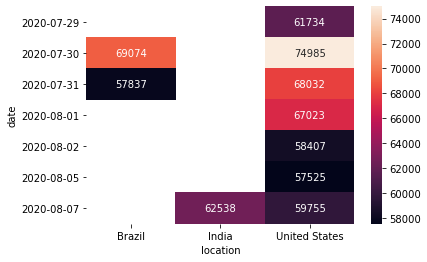

In [44]:
# Step 6: plotting heatmap using Seaborn
import seaborn as sns
sns.heatmap(top10_countries_pivot, annot=True, fmt='.0f')

In [46]:
# Creating a pivot table for continent
# We do not need to select top 10 records here as we have only 6 continents
# Notice the aggfunc below, it will actually sum the new_cases for each country in the continent.
continent_pivot = data1.pivot_table(index='date',columns='continent', values='new_cases', aggfunc='sum')
continent_pivot

continent,Africa,Asia,Europe,North America,Oceania,South America
date,,,,,,
2019-12-31,0.0,27.0,0.0,0.0,0.0,0.0
2020-01-01,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-02,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-03,0.0,17.0,0.0,0.0,0.0,0.0
2020-01-04,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
2020-08-04,11366.0,75027.0,22854.0,54562.0,403.0,40567.0
2020-08-05,9548.0,80010.0,18247.0,69692.0,430.0,75732.0
2020-08-06,15661.0,83871.0,21542.0,64997.0,762.0,88016.0


In [47]:
# find country with maximum cases 
# axis=1 to find max in the row, default is column
top10_countries_pivot.idxmax(axis=1)

date
2020-07-29    United States
2020-07-30    United States
2020-07-31    United States
2020-08-01    United States
2020-08-02    United States
2020-08-05    United States
2020-08-07            India
dtype: object

In [48]:
# find country with minimum cases
# axis=1 to find max in the row, default is column
top10_countries_pivot.idxmin(axis=1)

date
2020-07-29    United States
2020-07-30           Brazil
2020-07-31           Brazil
2020-08-01    United States
2020-08-02    United States
2020-08-05    United States
2020-08-07    United States
dtype: object

In [50]:
# Creating Index on continent, location and date
# The index will be created in the order supplied
indexed_data = data1.set_index(['continent','location','date']).sort_index()
# values of the index
indexed_data.index.values

array([('Africa', 'Algeria', '2019-12-31'),
       ('Africa', 'Algeria', '2020-01-01'),
       ('Africa', 'Algeria', '2020-01-02'), ...,
       (nan, 'World', '2020-08-06'), (nan, 'World', '2020-08-07'),
       (nan, 'World', '2020-08-08')], dtype=object)

In [53]:
indexed_data.loc[('Africa', 'Algeria', '2019-12-31')]

iso_code                                  DZA
total_cases                                 0
new_cases                                   0
total_deaths                                0
new_deaths                                  0
total_cases_per_million                     0
new_cases_per_million                       0
total_deaths_per_million                    0
new_deaths_per_million                      0
new_tests                                 NaN
total_tests                               NaN
total_tests_per_thousand                  NaN
new_tests_per_thousand                    NaN
new_tests_smoothed                        NaN
new_tests_smoothed_per_thousand           NaN
tests_per_case                            NaN
positive_rate                             NaN
tests_units                               NaN
stringency_index                          NaN
population                         4.3851e+07
population_density                     17.348
median_age                        

In [54]:
indexed_data.loc[('North America','United States','2020-08-07'),'new_cases']

59755.0

In [55]:
indexed_data.loc[('Asia',slice(None),'2020-08-07'),'new_cases']

continent  location              date      
Asia       Afghanistan           2020-08-07       41.0
           Armenia               2020-08-07      233.0
           Azerbaijan            2020-08-07      144.0
           Bahrain               2020-08-07      375.0
           Bangladesh            2020-08-07     2977.0
           Bhutan                2020-08-07        3.0
           Brunei                2020-08-07        0.0
           Cambodia              2020-08-07        0.0
           China                 2020-08-07      132.0
           Georgia               2020-08-07        0.0
           India                 2020-08-07    62538.0
           Indonesia             2020-08-07     1882.0
           Iran                  2020-08-07     2634.0
           Iraq                  2020-08-07     3047.0
           Israel                2020-08-07     1730.0
           Japan                 2020-08-07     1552.0
           Jordan                2020-08-07        1.0
           Kazakhstan

In [61]:
indexed_data.loc[(slice(None),['India','United States'],['2020-08-06','2020-08-07']),'new_cases']

continent      location       date      
Asia           India          2020-08-06    56282.0
                              2020-08-07    62538.0
North America  United States  2020-08-06    52804.0
                              2020-08-07    59755.0
Name: new_cases, dtype: float64

In [63]:
# multiple aggregations on new_cases
grouped_data = data.groupby('date').agg({'new_cases':['sum','max','min']})
grouped_data

new_cases              
                 sum    max    min
date                              
2020-07-29     61734  61734  61734
2020-07-30    144059  74985  69074
2020-07-31    125869  68032  57837
2020-08-01     67023  67023  67023
2020-08-02     58407  58407  58407
2020-08-05     57525  57525  57525
2020-08-07    122293  62538  59755

In [64]:
# columns in grouped data
grouped_data.columns

MultiIndex([('new_cases', 'sum'),
            ('new_cases', 'max'),
            ('new_cases', 'min')],
           )

In [65]:
# here are we just joining the tuple with '_'
# this works for level-2 column indexes only
new_columns = ['%s%s' % (a, '_%s' % b if b else '') for a, b in grouped_data.columns]
new_columns

['new_cases_sum', 'new_cases_max', 'new_cases_min']

In [67]:
# change grouped_data columns.
grouped_data.columns = new_columns
grouped_data

,new_cases_sum,new_cases_max,new_cases_min
date,,,
2020-07-29,61734,61734,61734
2020-07-30,144059,74985,69074
2020-07-31,125869,68032,57837
2020-08-01,67023,67023,67023
2020-08-02,58407,58407,58407
2020-08-05,57525,57525,57525
2020-08-07,122293,62538,59755
